# Seattle Weather Prediction

This notebook provides a comprehensive guide to predicting weather in Seattle using a K-Nearest Neighbors (KNN) model. It includes steps for data preprocessing, model training, hyperparameter tuning, and evaluation. Additionally, we implement a function to predict weather based on user input and visualize the model's performance.

## Table of Contents
* [Importing Dependencies](#importing-dependencies)
* [Loading and Preprocessing Data](#Loading-and-Preprocessing-Data)
* [Data Splitting for Training and Testing](#data-splitting-for-training-and-testing)
* [Hyperparameter Tuning with GridSearchCV](#hyperparameter-tuning-with-gridsearchcv)
* [Model Training and Evaluation](#model-training-and-evaluation)
* [Prediction Function](#prediction-function)
* [Visualization](#visualization)

### 1. Importing Dependencies

In this section, we import the necessary libraries for data manipulation, visualization, machine learning model building, and evaluation.




In [1]:
#importing the dependecies 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
from datetime import datetime



### 2. Loading and Preprocessing Data
Here, we read the weather data from a CSV file named `seattle-weather.csv`, preprocess it, and extract the necessary features.



In [2]:
#importing my data from the CSV file
# also what im doing in here is reading  the file and from .head() we can see the top 5 data from my csv file
weather_data = pd.read_csv("seattle-weather.csv")
weather_data.head()


,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [3]:
# so to convert the values from the excel file what im doing in here is converting it in numerical value using label_encoder
label_encoder = LabelEncoder()
weather_data['weather_encoded'] = label_encoder.fit_transform(weather_data['weather'])

In [4]:
# Extract month and day as features
weather_data['month'] = pd.to_datetime(weather_data['date']).dt.month
weather_data['day'] = pd.to_datetime(weather_data['date']).dt.day

In [5]:
#dropping the data as we dont it directly('date', 'weather')
weather_data_processed = weather_data.drop(['date', 'weather'], axis=1)

### 3. Data Splitting for Training and Testing

The data is split into training and testing sets with 80% used for training and 20% for testing.

In [6]:
# splitting my data into label x and y to make it easy
X = weather_data_processed.drop('weather_encoded', axis=1)
y = weather_data_processed['weather_encoded']

In [7]:
# dividing my data into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### 4. Hyperparameter Tuning with GridSearchCV
GridSearchCV is used to find the optimal number of neighbors (`k`) for the KNN algorithm by testing values from 1 to 24 using cross-validation.

In [9]:
# here i used hyper parameter tuning with grid search CV and what it does nothing just remember it is used to find the optimal number of k
param_grid = {'n_neighbors': np.arange(1, 25)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
optimal_k = grid_search.best_params_['n_neighbors']

### 5. Model Training and Evaluation
The KNN model is created with the optimal number of neighbors and trained using the scaled training data. The model's performance is evaluated on the test set.


In [10]:
# I initialize my k == 5(lets assume) , iska matlab this will check 5 neighbours near to him 
knn = KNeighborsClassifier(n_neighbors=optimal_k)

In [11]:
# .fit(), isse train model hota hai
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=np.int64(17))

In [12]:
# .predict(), this function the data we trained earlier, now what we can do is predict from that model. 
#mathematical formual used in here is min(⅀sqrt((xi^2 - yi^2))) and what we need is the minimum value 
# NOte: number of nodes priority >> min_distance
y_pred = knn.predict(X_test_scaled)

In [13]:
# just checking my model performace 
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

In [14]:
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.73
Classification Report:
              precision    recall  f1-score   support

     drizzle       1.00      0.11      0.20         9
         fog       0.33      0.04      0.07        25
        rain       0.72      0.83      0.78       120
        snow       0.00      0.00      0.00         8
         sun       0.74      0.85      0.79       131

    accuracy                           0.73       293
   macro avg       0.56      0.37      0.37       293
weighted avg       0.68      0.73      0.68       293



### 6. Prediction Function
This function takes user input for various weather features and uses the trained KNN model to predict the weather for that date.

In [15]:
# now what i done here is created a function and use my model to predict it 
# i take here the precipitation , max_temp, min_temp, min_temp and wind_speed
def predict_weather_for_date():
    try:
        # Taking user input for the features
        year = int(input("Enter the year: "))
        month = int(input("Enter the month (1-12): "))
        day = int(input("Enter the day (1-31): "))
        precipitation = float(input("Enter precipitation: "))
        temp_max = float(input("Enter max temperature: "))
        temp_min = float(input("Enter min temperature: "))
        wind = float(input("Enter wind speed: "))
    except ValueError:
        print("Invalid input. Please enter numerical values for all features.")
        return None, None

    # Creating a DataFrame for the input features
    input_data = pd.DataFrame({
        'precipitation': [precipitation],
        'temp_max': [temp_max],
        'temp_min': [temp_min],
        'wind': [wind],
        'month': [month],
        'day': [day]
    })
    
    # Scaling the input features using the same scaler used for training
    input_data_scaled = scaler.transform(input_data)
    
    # Predicting the weather using the trained KNN model
    weather_encoded = knn.predict(input_data_scaled)
    
    # Decoding the predicted weather to get the original label
    predicted_weather = label_encoder.inverse_transform(weather_encoded)
    
    return predicted_weather[0], input_data

# Call the prediction function to take input from the user and predict the weather
predicted_weather, input_data = predict_weather_for_date()
if predicted_weather:
    print(f"Predicted weather: {predicted_weather}")


Enter the year:  2025
Enter the month (1-12):  8
Enter the day (1-31):  16
Enter precipitation:  6
Enter max temperature:  22
Enter min temperature:  17
Enter wind speed:  4


Predicted weather: sun


### 7. Scatter plot graph

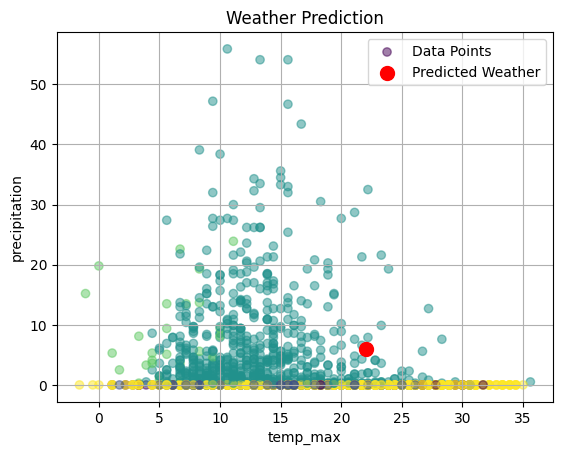

In [16]:
#scatter plot graph 
# Visualizing the data in a scatter plot
feature1 = 'temp_max'
feature2 = 'precipitation'

# Select features for visualization
X_vis = weather_data_processed[[feature1, feature2]]

# Create scatter plot
plt.scatter(X_vis[feature1], X_vis[feature2], c=y, alpha=0.5, label='Data Points')

# Plot predicted data point
if predicted_weather:
    plt.scatter(input_data[feature1], input_data[feature2], color='red', marker='o', s=100, label='Predicted Weather')

plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title("Weather Prediction")
plt.legend()
plt.grid(True)
plt.show()

### 8. Heat Map

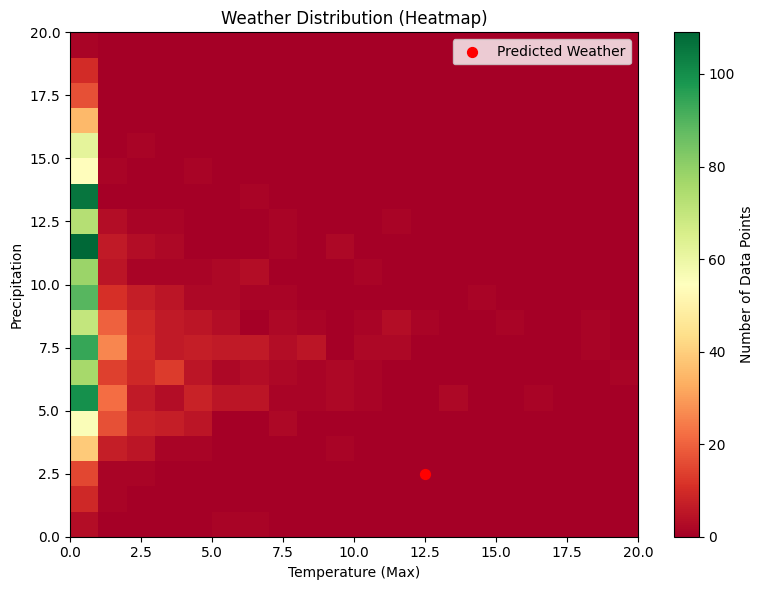

In [17]:
# Heatmap visualization (assuming 'precipitation' and 'temp_max' are numerical)
plt.figure(figsize=(8, 6))

# Create a 2D grid for the heatmap based on precipitation and temp_max ranges
grid_size = 20  # Adjust grid size as needed
precipitation_range = (weather_data_processed['precipitation'].min(), weather_data_processed['precipitation'].max())
temp_max_range = (weather_data_processed['temp_max'].min(), weather_data_processed['temp_max'].max())

# Create an empty grid to store weather category counts
weather_counts = np.zeros((grid_size, grid_size))

# Iterate through each data point and increment the count in the corresponding grid cell
for index, row in weather_data_processed.iterrows():
    precipitation_cell = int((row['precipitation'] - precipitation_range[0]) / (precipitation_range[1] - precipitation_range[0]) * (grid_size - 1))
    temp_max_cell = int((row['temp_max'] - temp_max_range[0]) / (temp_max_range[1] - temp_max_range[0]) * (grid_size - 1))
    weather_counts[temp_max_cell, precipitation_cell] += 1

# Plot the heatmap using the weather category counts
plt.pcolormesh(weather_counts, cmap='RdYlGn')  # Adjust colormap as desired

# Add labels and title
plt.xlabel('Temperature (Max)')
plt.ylabel('Precipitation')
plt.title('Weather Distribution (Heatmap)')
plt.colorbar(label='Number of Data Points')

# Mark the predicted data point on the heatmap (if applicable)
if predicted_weather and isinstance(input_data['precipitation'].values[0], (float, int)) and isinstance(input_data['temp_max'].values[0], (float, int)):
    precipitation_cell = int((input_data['precipitation'].values[0] - precipitation_range[0]) / (precipitation_range[1] - precipitation_range[0]) * (grid_size - 1))
    temp_max_cell = int((input_data['temp_max'].values[0] - temp_max_range[0]) / (temp_max_range[1] - temp_max_range[0]) * (grid_size - 1))
    plt.scatter(temp_max_cell + 0.5, precipitation_cell + 0.5, color='red', marker='o', s=50, label='Predicted Weather')
    plt.legend()

plt.tight_layout()
plt.show()

### 9. Bar graph visualization

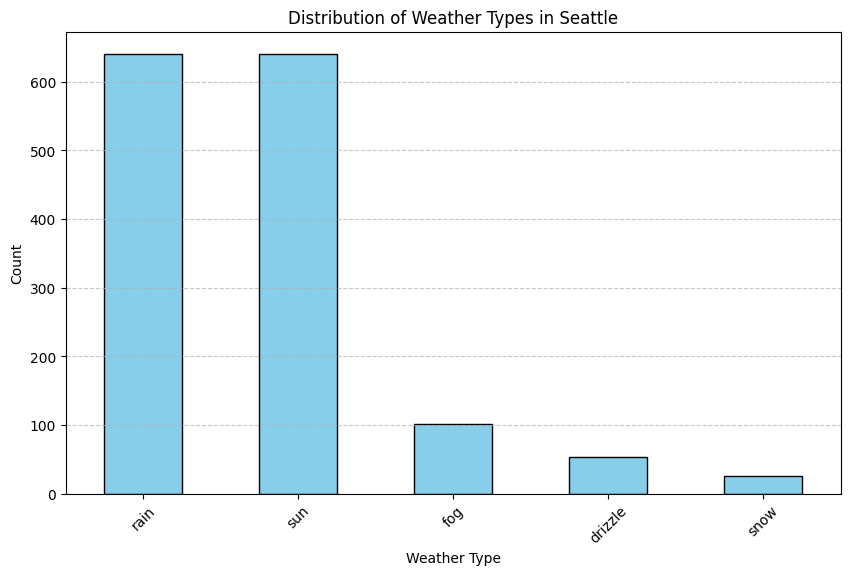

In [18]:
# bar graph just for simple visualization 
weather_counts = weather_data['weather'].value_counts()

# Create the bar graph
plt.figure(figsize=(10, 6))
weather_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Weather Types in Seattle')
plt.xlabel('Weather Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()